### Making a decision tree in python

This notebooks shows how to take a csv file and make a decision tree from it, it reflects some of the work I did for my bachelor thesis in 2017. 

Feel free to send me any questions.
https://www.linkedin.com/in/tariq-mouhtadi/

P.S. Deze notebook is in het Engels uit gewoonte, je kan me gewoon in het Nederlands vragen stellen.

#### imports

Numpy is used to load the data and the targets from a csv.
It is a great scientific package to work with data. https://numpy.org

Alternatively if you are used to working with R, you can have a look at Pandas. https://pandas.pydata.org
Here I just use pandas to show the data in a table format.

There is a nice cheat sheet to use with numpy.
https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf

In [1]:
import numpy as np
import pandas as pd

Might need to install additional dependency `graphviz`

In [2]:
# to install graphviz for jupyter:
# conda install python-graphviz
import graphviz

scikit-learn `sklearn` is also provided in Anaconda, it provides a huge number of machine learning implementations.

https://scikit-learn.org/stable/

In [3]:
# For making decision trees.
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# For a random forest.
from sklearn.ensemble import RandomForestClassifier

### Importing the Data

In [4]:
csv_filename = 'dataset.csv'

The data consists of combined data from different experiments that was all condensed to the same format.

The values are:
- range, the maximum deviation on the read to the left plus to the right during the trial.
- gender, the gender of the participant (0 or 1)
- handedness, left or right handed (0 or 1)
- age, the age of the participant in years 
- phonepracticetime, a score of how well participants performed while practicing the task. 
- phonepretesttime, a score of how well participants performed while 'pre-testing' the task, this was a different stage in the original experiments.
- singledrivingscore, a score of how well participants performed when just driving without having to do a task while driving.

In [5]:
display_data = np.loadtxt(open(csv_filename, 'rb'),  
                          delimiter=',',  
                          skiprows=1,  
                          usecols=(1,3,4,5,6,7,8,9))

pd.DataFrame(
    display_data,
    columns=[
        'range',
        'gender',
        'handedness',
        'age',
        'phonepracticetime',
        'phonepretesttime',
        'singledrivingscore',
        'target'
    ])

range  gender  handedness   age  phonepracticetime  phonepretesttime  \
0      1.898     0.0         0.0  27.0            51.8788          40.34252   
1      1.610     0.0         0.0  23.0             6.4000          13.71523   
2      2.216     0.0         0.0  26.0            28.2996          11.28364   
3      2.522     0.0         1.0  21.0            26.4328           9.54620   
4      3.342     0.0         0.0  23.0            10.7842          26.77057   
...      ...     ...         ...   ...                ...               ...   
998   12.041     0.0         0.0  31.0             9.7392          18.27776   
999    1.920     0.0         0.0  26.0            28.2996          11.28364   
1000   3.916     0.0         0.0  22.0             7.3994          16.13606   
1001   2.528     0.0         0.0  21.0            22.1436          15.59891   
1002   2.554     0.0         0.0  35.0            29.8818          13.33317   

      singledrivingscore  target  
0               0.858000     0.0  
1               1.041200     1.0  
2               0.963000     1.0  
3               1.178200     0.0  
4               1.961500     1.0  
...                  ...     ...  
998             0.947800     0.0  
999             0.963000     0.0  
1000            0.914182     0.0  
1001            1.065300     0.0  
1002            0.978000     1.0  

[1003 rows x 8 columns]

As the data consists of ~1000 rows, I used the first 800 rows to train the classifier and the rest to score the fit.

In [6]:
data = np.loadtxt(open(csv_filename, 'rb'),  
                  delimiter=',',  
                  skiprows=1,  
                  usecols=(1,3,4,5,6,7,8))

target = np.loadtxt(open(csv_filename, 'rb'), 
                    np.dtype([('dualtaskscore',str,25)]), 
                    delimiter=',', 
                    skiprows=1, 
                    usecols=(9,))

feature_names = [
    'range',
    'gender',
    'handedness',
    'age',
    'phonepracticetime',
    'phonepretesttime',
    'singledrivingscore'
]

# Set up the training and test data.
training_data    = data[0:800]
test_data        = data[800:]

training_targets = target[0:800]
test_targets     = target[800:]

### DecisionTreeClassifier

For my thesis is used a decision tree to look at the importance of the different variables.

In [7]:
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3)
clf = clf.fit(training_data, training_targets)

print(f'The score of the model fit is: {clf.score(test_data, test_targets)}')

arr = np.array([feature_names, clf.feature_importances_]).T
pd.DataFrame(arr, columns = ['variable', 'feature importance'])

The score of the model fit is: 0.5763546798029556


variable   feature importance
0               range   0.6262380371511751
1              gender                  0.0
2          handedness                  0.0
3                 age                  0.0
4   phonepracticetime                  0.0
5    phonepretesttime  0.31533671463005214
6  singledrivingscore  0.05842524821877269

#### Plotting the decision tree

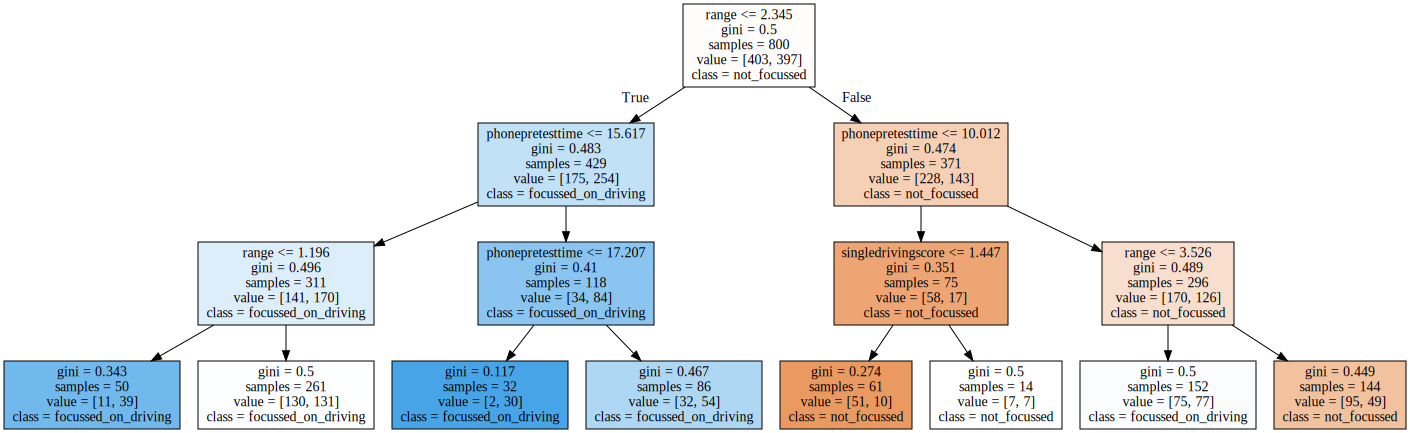

In [8]:
# Use the graphviz instead of plot_tree for better readability.
dot_data = export_graphviz(clf, 
                           out_file=None,
                           feature_names=feature_names, 
                           class_names=['not_focussed', 'focussed_on_driving'], 
                           impurity=True, 
                           filled=True)

src = graphviz.Source(dot_data)

src

With a score of ~0.58 the fit here is not great. Getting your data preprocessed correctly will prove key in building a better model than I did.

### RandomForestClassifier

To use a Random forest instead of a Decision tree use the `RandomForestClassifier`

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier

I slightly modified my code to show how to fit a random forest to the same data.

In [9]:
# As an example this classifier uses an arbitrary 1000 trees with a max depth of 10.
rf_clf = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=10)
rf_clf = rf_clf.fit(data[0:800], target[0:800])

print(f'The score of the model fit is: {rf_clf.score(test_data, test_targets)}')

arr = np.array([feature_names, rf_clf.feature_importances_]).T
pd.DataFrame(arr, columns = ['variable', 'feature importance'])

The score of the model fit is: 0.5911330049261084


variable    feature importance
0               range    0.8066986856172054
1              gender  0.010207780491474196
2          handedness  0.007102206528222848
3                 age  0.031201938055709085
4   phonepracticetime   0.04616300516371545
5    phonepretesttime  0.050338192694858994
6  singledrivingscore   0.04828819144881411

As there isn't 1 tree you would obviously need to find a new way to visualize the trained model.